# Cap. 6 - NumPy


O NumPy é o principal pacote Python para programação científica. Tanto é, que mesmo sem formalmente apresentá-lo, já temos usado suas funcionalidades.

O núcleo do NumPy é o objeto `ndarray` e funções que atuam nesses objetos de maneira muito eficiente. Essas funções são implementadas em C por trás das cortinas.

Além disso, o NumPy suporta vetorização de funções, isto é, um única operação pode ser executada em todos elementos de um array sem a necessidade de usar loops.

Por exemplo:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)

In [ ]:
%%timeit
c = []
for i in range(1000):
    c.append(a[i]*b[i])

385 µs ± 7.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
c = a*b

1.45 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
385/1.45

265.51724137931035

Nesse caso, a operação foi executada da ordem de 300 vezes mais rápida!

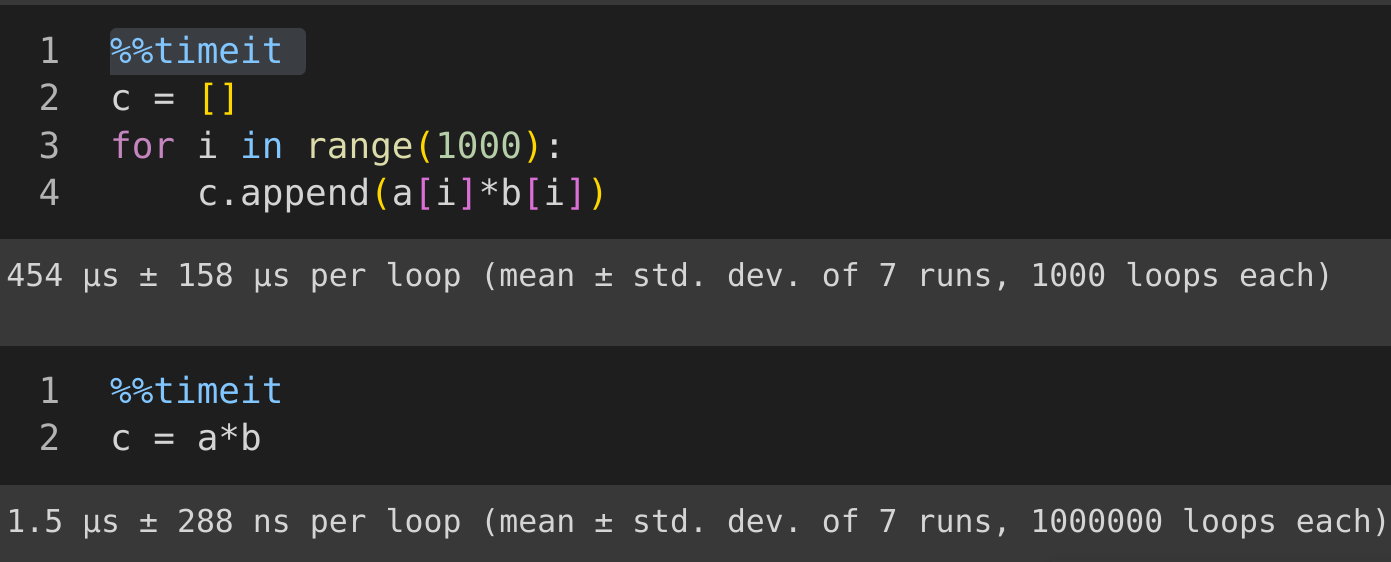

## Métodos básicos para ndarrays

A classe `ndarray` do NumPy pode ser pensada como uma tabela multidimensional de elementos indexados por uma tupla de inteiros. Diferentemente de listas e tuplas, ndarrays não podem ser de tipos diferentes. O parâmetro *dtype* especifica o tipo de uma ndarray.

Além disso, as dimensões de ndarray são chamadas *axes* e número de *axes* é o rank da ndarray.

### Criando ndarray com np.array

In [ ]:
#cria usando tuplas
a = np.array((100, 101, 102, 103))
a

array([100, 101, 102, 103])

In [ ]:
#cria usando listas
b = np.array([[1. ,2.], [3. ,4.]])
b

array([[1., 2.],
       [3., 4.]])

In [ ]:
#note que o dtype foi inferido
a.dtype, b.dtype

(dtype('int64'), dtype('float64'))

In [ ]:
print(b)

[[1. 2.]
 [3. 4.]]


In [ ]:
#podemos indexar com tuplas
b[0,1],b[(0,1)]

(2.0, 2.0)

In [ ]:
#extrai a linha
b[0]

array([1., 2.])

In [ ]:
#extrai a coluna
b[::,0]

array([1., 3.])

In [ ]:
#são mutáveis
b[1,1]=100
print(b)

[[  1.   2.]
 [  3. 100.]]


In [ ]:
# a inferência do dtype funciona mesmo com mistura de tipos
c = np.array([-1, 0, 2.])
c.dtype

dtype('float64')

In [ ]:
c = np.array([-1, 0, 2.,'a'])
c.dtype

dtype('<U32')

In [ ]:
#veja que tudo virou str
# '<U32' significa unicode string de 32 chars
c

array(['-1', '0', '2.0', 'a'], dtype='<U32')

In [ ]:
c[-1] = 'um dois tres quatro cinco seis sete oito nove'

In [ ]:
#veja que fica truncado
c[-1]

'um dois tres quatro cinco seis s'

In [ ]:
#podemos explicitamente definir o dtype
c = np.array([-1, 0, 2.,'a'],dtype='<U45')
c.dtype

dtype('<U45')

In [ ]:
c[-1] = 'um dois tres quatro cinco seis sete oito nove'
c

array(['-1', '0', '2.0', 'um dois tres quatro cinco seis sete oito nove'],
      dtype='<U45')

In [ ]:
c = np.array([0, 4, -4], dtype=complex)
c

array([ 0.+0.j,  4.+0.j, -4.+0.j])

In [ ]:
#criar um array 'vazio'
c = np.empty(shape=(2,2))

In [ ]:
#note que o valores são apenas lixo da memória
c

array([[  1.,   2.],
       [  3., 100.]])

In [ ]:
#criar um array com zeros
c = np.zeros(shape=(2,2)) #por padrão o dtype é float
c

array([[0., 0.],
       [0., 0.]])

In [ ]:
c.dtype

dtype('float64')

In [ ]:
#criar um array com uns
c = np.ones(shape=(2,2),dtype=int)
c

array([[1, 1],
       [1, 1]])

In [ ]:
a = np.array([100,101,102,103])

In [ ]:
#criar baseado em outra array
c = np.ones_like(a)
c

array([1, 1, 1, 1])

In [ ]:
#criar baseado em outra array
c = np.zeros_like(a)
c

array([0, 0, 0, 0])

In [ ]:
#veja que o dtype é o mesmo de a
#mas podemos mudar isso
c = np.zeros_like(a, dtype=float)
c

array([0., 0., 0., 0.])

In [ ]:
c.dtype

dtype('float64')

### Inicializando arrays a partir de sequências

- `np.arange` é o equivalente numpy do `range` nativo do Python.
- `np.linspace` gera lista com elementos igualmente espaçados.

In [ ]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# início, fim, passo (não inclui o fim)
np.arange(1.5, 3., 0.5)

array([1.5, 2. , 2.5])

In [ ]:
np.arange(1.5, 3.0+0.001, 0.5)

array([1.5, 2. , 2.5, 3. ])

In [ ]:
#início, fim, número de passos (inclui o fim)
np.linspace(1, 20, 5)

array([ 1.  ,  5.75, 10.5 , 15.25, 20.  ])

In [ ]:
#retstep=True faz o returno ser uma tupla
#primeiro elemento é a lista, segundo é o passo
x, dx = np.linspace(1, 20, 5,retstep=True)

In [ ]:
x

array([ 1.  ,  5.75, 10.5 , 15.25, 20.  ])

In [ ]:
dx

4.75

O passo é calculado via:

$$
\text{passo}=\frac{\text{fim}-\text{início}}{\text{número de passos} - 1}
$$

In [ ]:
(20-1)/(5-1)

4.75

In [ ]:
#endpoint=False não inclui o fim (como no np.arange)
np.linspace(0, 5, 5, endpoint=False)

array([0., 1., 2., 3., 4.])

### Inicializando um array a partir de uma função

- `np.fromfunction` permite usar uma função específica para criar arrays. Essa função precisa tomar um número de argumentos igual à dimensão do array. Esses argumentos serão preenchidos com os índices do array a ser criado.

In [ ]:
def f(i, j):
    return i+j

In [ ]:
np.fromfunction(f,(2,2))

array([[0., 1.],
       [1., 2.]])

In [ ]:
#podemos usar funções lambda
np.fromfunction(lambda i,j: i+j, (4,3))

array([[0., 1., 2.],
       [1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]])

In [ ]:
np.fromfunction(lambda i,j: i*j, (4,3))

array([[0., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.],
       [0., 3., 6.]])

*Exemplo E6.1*: Criando um "array pente". Esse array é uma lista de *N* elementos, no qual a cada $n$ elementos temos o valor 1 e o restante são zeros.

Por exemplo, se $N=24$ e $n=6$

$$
1000001000001000001000001000001
$$



In [ ]:
def f(i):
    #se o resto da divisão de i por n for zero
    #retorna 1 (lembre que 1==True)
    return (i%n==0)*1

In [ ]:
N, n = 24,6
np.fromfunction(f,(N,))

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

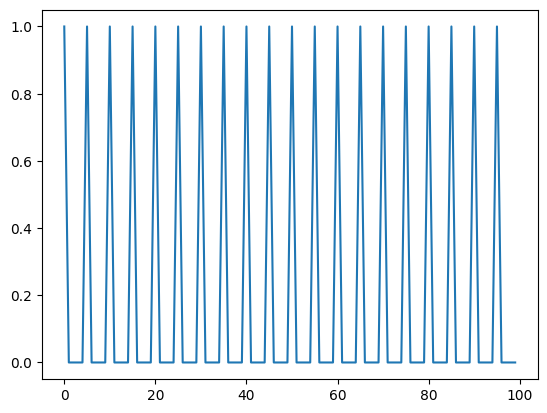

In [ ]:
N, n = 100,5
pente = np.fromfunction(f,(N,))
plt.plot(pente)

### Atributos de um ndarray

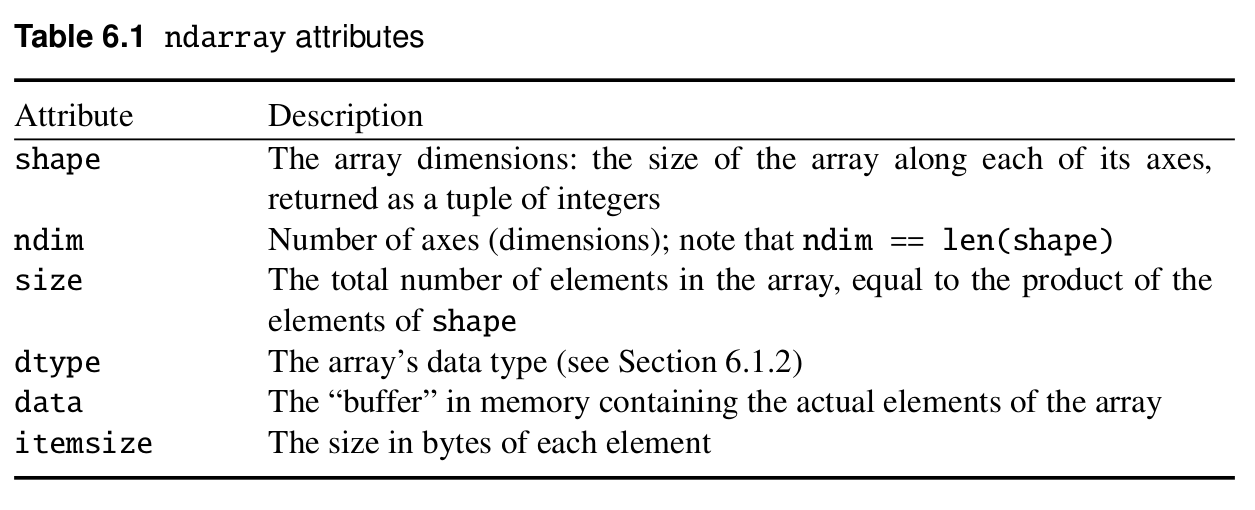

In [ ]:
a = np.array(((1 , 0, 1), (0, 1, 0)))

In [ ]:
print(a)

[[1 0 1]
 [0 1 0]]


In [ ]:
#tamanho em cada eixo (dua linhas, três colunas)
a.shape

(2, 3)

In [ ]:
#número de eixos, dimensão ou rank
a.ndim

2

In [ ]:
#número de elementos
a.size

6

In [ ]:
#veja que é diferente
len(a)

2

In [ ]:
#localização da memória alocada para o array
a.data

In [ ]:
a.dtype

dtype('int64')

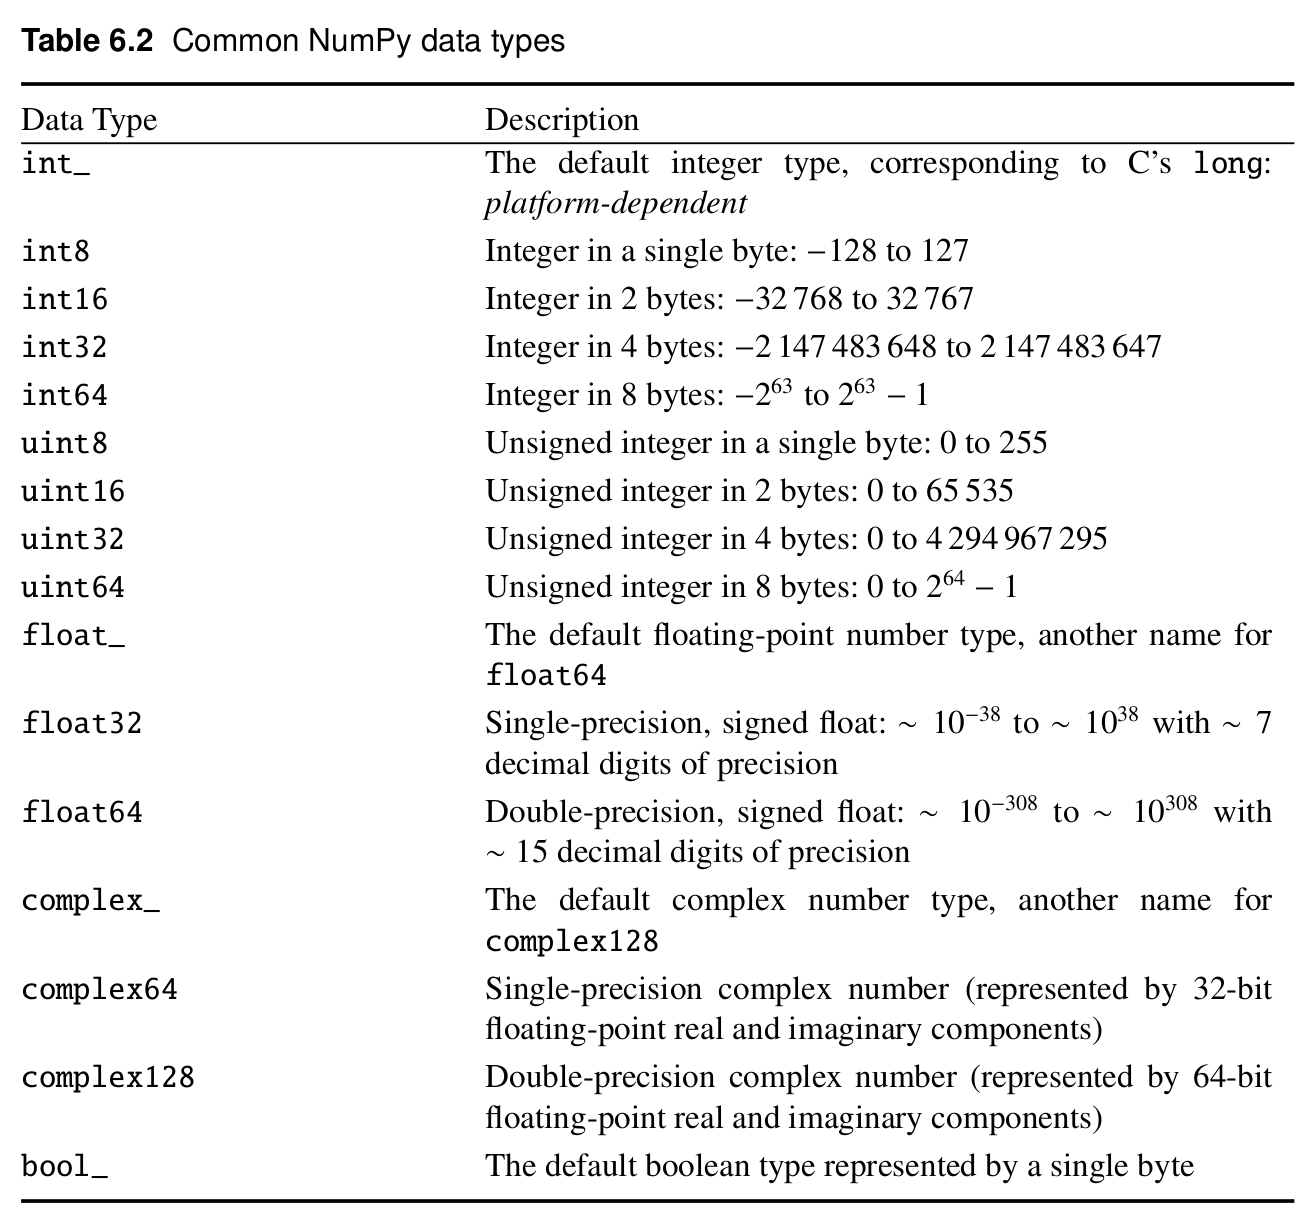

In [ ]:
a

array([[1, 0, 1],
       [0, 1, 0]])

In [ ]:
#convertendo para outro tipo com o .astype
b = a.astype('float')

In [ ]:
b.dtype

dtype('float64')

In [ ]:
a.astype('bool')

array([[ True, False,  True],
       [False,  True, False]])

**Strings in numpy são representadas com tipos de tamanho fixo**

In [ ]:
s = "não"

In [ ]:
arr = np.array([s])

In [ ]:
arr

array(['não'], dtype='<U3')

In [ ]:
arr[0]='física'

In [ ]:
arr

array(['fís'], dtype='<U3')

### Funções universais ou *ufuncs*

Além das função nativas no Python (+, -, / ...) o numpy tem uma lista grande de funções (matemáticas e de outro tipos) que atuam em cada elemento de um array, produzindo outro array sem a necessidade de loops. Essas funções são chamadas ufuncs e processo é denominado vetorização.

In [ ]:
x = np.linspace(1, 5, 5)
x

array([1., 2., 3., 4., 5.])

In [ ]:
x**2

array([ 1.,  4.,  9., 16., 25.])

In [ ]:
x-1

array([0., 1., 2., 3., 4.])

In [ ]:
np.sqrt(x-1)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

In [ ]:
y = np.exp(x)
y

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [ ]:
x-y

array([  -1.71828183,   -5.3890561 ,  -17.08553692,  -50.59815003,
       -143.4131591 ])

In [ ]:
np.sin(x-y)

array([-0.98914371,  0.77966409,  0.98139051, -0.32656551,  0.89125406])

O operador * faz multiplicação elemento a elemento

In [ ]:
a = np.array(((1,2),(3,4)))
b = a

In [ ]:
a

array([[1, 2],
       [3, 4]])

In [ ]:
a*b

array([[ 1,  4],
       [ 9, 16]])

In [ ]:
#devemos usar @ multiplicação matricial
a @ b

array([[ 7, 10],
       [15, 22]])

In [ ]:
#ou o np.dot
np.dot(a,b)

array([[ 7, 10],
       [15, 22]])

Além disso, comparações e operadores lógicos também são vetorizados

In [ ]:
a = np.linspace(1,200,10)

In [ ]:
a

array([  1.        ,  23.11111111,  45.22222222,  67.33333333,
        89.44444444, 111.55555556, 133.66666667, 155.77777778,
       177.88888889, 200.        ])

In [ ]:
a>100

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
(a>50)

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
(a<150)

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False])

In [ ]:
(a>50) & (a<150)

array([False, False, False,  True,  True,  True,  True, False, False,
       False])

### Tipos especiais np.nan e np.inf

- `np.nan` representa o resultado de uma operação matemática que não é bem definida (*NaN* e uma sigla para *not a number*). Exemplo de nan é 0/0.

- `np.inf` representa $\infty$.

In [ ]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
a[-1]=-3

In [ ]:
b = a/0

<ipython-input-94-b1bf78b83a36>:1: RuntimeWarning: divide by zero encountered in divide
  b = a/0
<ipython-input-94-b1bf78b83a36>:1: RuntimeWarning: invalid value encountered in divide
  b = a/0


In [ ]:
b

array([ nan,  inf,  inf, -inf])

In [ ]:
#testar se é nan
np.isnan(b)

array([ True, False, False, False])

In [ ]:
#testar se infty
np.isinf(b)

array([False,  True,  True,  True])

In [ ]:
#testar se é finito
np.isfinite(b)

array([False, False, False, False])

**Note que nan não é nem finito nem infinito!**

*Exemplo E6.2*: Quadrado mágico ([magic square](https://en.wikipedia.org/wiki/Magic_square)) é uma matriz $N\times N$, cujas somas das linhas, colunas e diagonal principal é igual $N(N^2+1)/2$.

Por exemplo, para $N=3$, temos:


$$
\text{soma} = 3(3^2+1)/2 = 15
$$

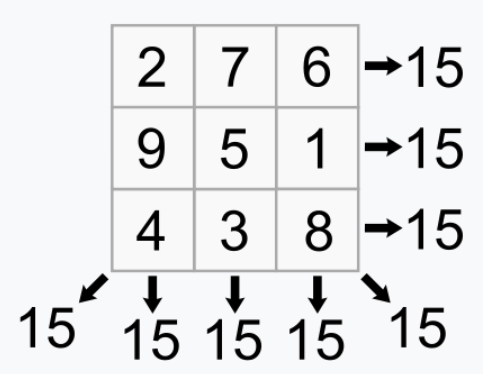

Assumindo $N$ ímpar, um método para construir esse objeto consiste de:

1. Começando no meio da primeira linha e definindo $n=1$;
2. Colocar $n$ nessa posição do grid;
3. Terminar se $n=N^2$ (i.e., tudo já foi preenchido) ou incrementar $n$ caso contrário;
4. Mover para o sítio na superior à direita (usando condições periódicas) ou mover verticalmente para baixo se a célula já estiver preenchida.
5. Voltar ao passo 2.

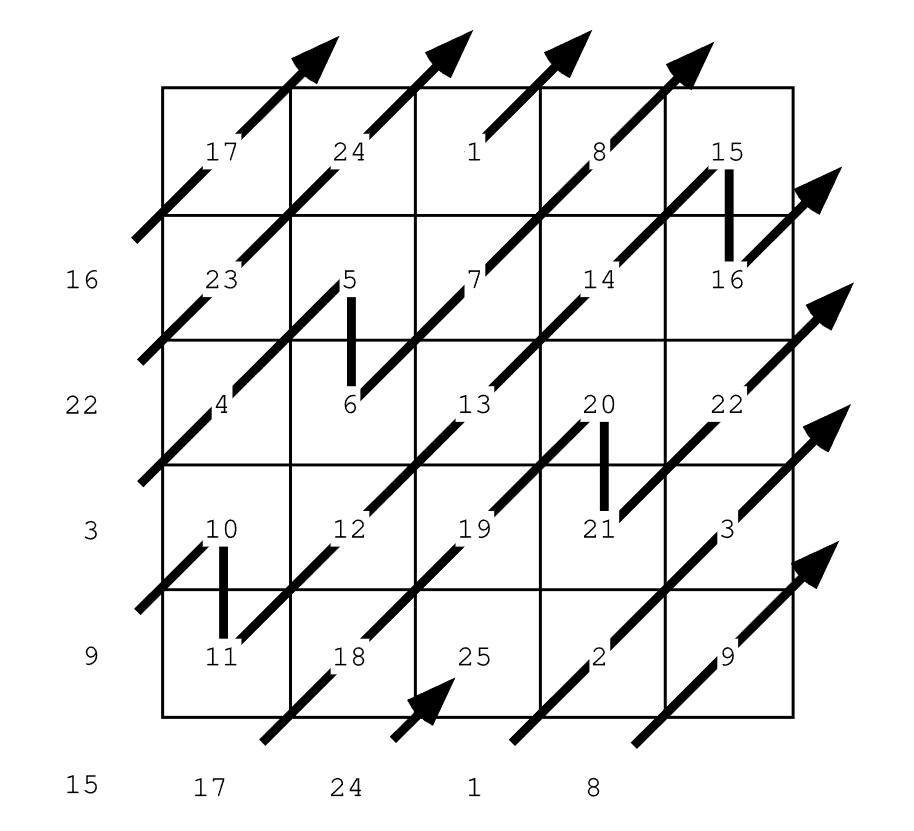

In [ ]:
5*(5**2+1)/2

65.0

In [ ]:
N = 5

magic_square = np.zeros((N, N), dtype=int)

n = 1
i, j = 0, N//2 #linha,coluna

while n <= N**2:
    magic_square[i, j] = n
    n += 1
    newi , newj = (i - 1)%N, (j + 1)%N #condição periódica
    # verifica se a posição nova está preenchida
    if magic_square[newi,newj]:
        i += 1 # desce se estiver
    else:
        i, j = newi , newj

print(magic_square)

[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]


In [ ]:
np.sum(magic_square[0])

65

<Axes: >

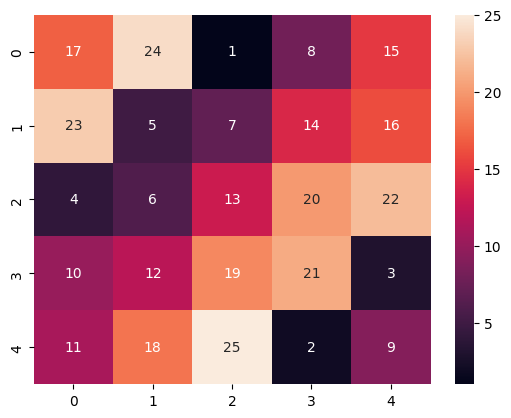

In [ ]:
sns.heatmap(magic_square,annot=True)

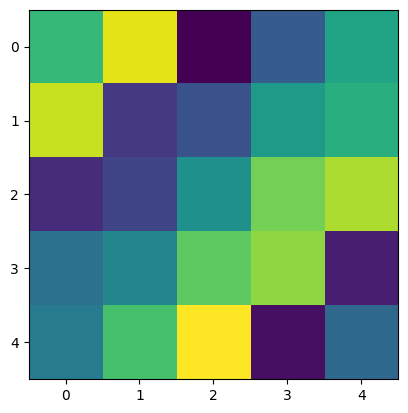

In [ ]:
plt.imshow(magic_square)

In [ ]:
from ipywidgets import interact
import seaborn as sns

In [ ]:
N = 5

magic_square = np.zeros((N, N), dtype=int)

n = 1
i, j = 0, N//2 #linha,coluna
fs = []
while n <= N**2:
    magic_square[i, j] = n
    n += 1
    f = plt.figure()
    sns.heatmap(magic_square,annot=True,vmax=25,vmin=0)
    plt.close()
    fs.append(f)
    newi , newj = (i - 1)%N, (j + 1)%N #condição periódica
    # verifica se a posição nova está preenchida
    if magic_square[newi,newj]:
        i += 1 # desce se estiver
    else:
        i, j = newi , newj

print(magic_square)

[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]


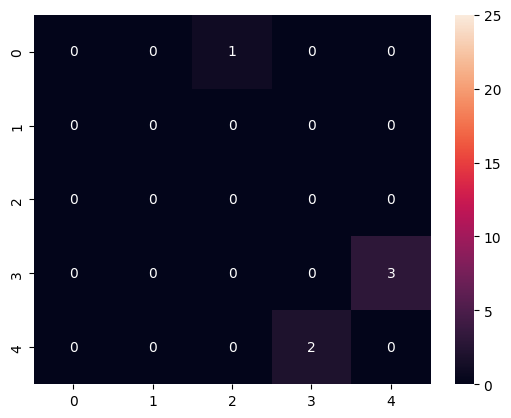

In [ ]:
fs[2]

In [ ]:
@interact(i=(0,len(fs)-1,1))
def show_f(i=0):
    return fs[i]


interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

In [ ]:
def f_magic_square(N=5):

    if (N%2==0):
        raise Exception("N deve ser ímpar!")

    magic_square = np.zeros((N, N), dtype=int)

    n = 1
    i, j = 0, N//2 #linha,coluna

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi , newj = (i - 1)%N, (j + 1)%N #condição periódica
        # verifica se a posição nova está preenchida
        if magic_square[newi,newj]:
            i += 1 # desce se estiver
        else:
            i, j = newi , newj

    return magic_square

In [ ]:
f_magic_square(5)

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

<Axes: >

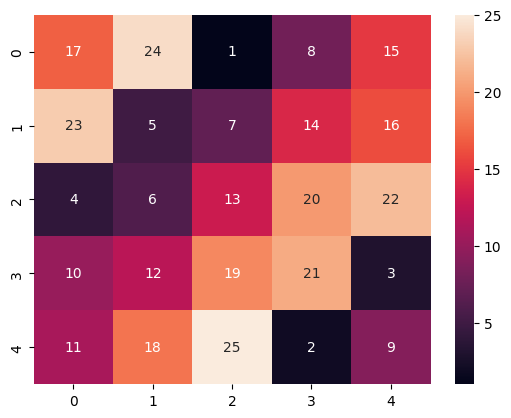

In [ ]:
sns.heatmap(f_magic_square(5),annot=True)

In [ ]:
9*(9**2+1)/2

369.0

In [ ]:
np.sum(f_magic_square(9)[0])

369

<Axes: >

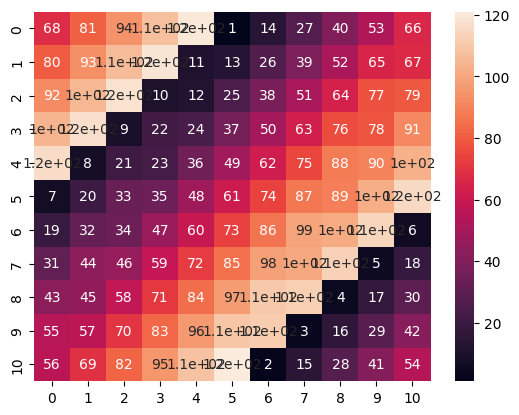

In [ ]:
sns.heatmap(f_magic_square(11),annot=True)

### Mudando a forma de um array

Independentemente das dimensões de um array, seus elementos são armazenados de maneira sequencial na memória.

Por exemplo:

In [ ]:
a = np.array(((1, 2), (3, 4)))
print(a)

[[1 2]
 [3 4]]


*a* é armazenado como: [1,2,3,4]. Essa ordem é o padrão do C e é chamada de *row-major*.

A estrutura do array pode ser modificada usando várias funções no numpy.

**flatten e ravel**

- `flatten` e `ravel` transformam um array multidimensional em um com apenas uma dimensão.

A diferença entre os dois é que o `flatten` faz o uma cópia (por isso é mais lento) do array, enquanto o `ravel` retorna apenas uma nova visualização do mesmo array.

Vejamos:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
b = a.flatten()
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#b é uma cópia, mudar seu valores não afeta a
b[0]=100
b,a

(array([100,   2,   3,   4,   5,   6,   7,   8,   9]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

In [ ]:
c = a.ravel()
c

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#agora c apenas uma referência para a
#mudar c, muda a!
c[0]=100
c,a

(array([100,   2,   3,   4,   5,   6,   7,   8,   9]),
 array([[100,   2,   3],
        [  4,   5,   6],
        [  7,   8,   9]]))

**resize e reshape**

- `resize` muda as dimensões de  um array *inplace*;
- `reshape` muda as dimensões de um e retorna uma referência (um view) do array original.

Vejamos:

In [ ]:
a = np.linspace(1, 4, 4)
a

array([1., 2., 3., 4.])

In [ ]:
#não retorna nada, mas modifica a
a.resize(2,2)

In [ ]:
a

array([[1., 2.],
       [3., 4.]])

In [ ]:
a = np.linspace(1, 4, 4)

In [ ]:
a.reshape(2,2)

array([[1., 2.],
       [3., 4.]])

In [ ]:
b = a.reshape(2,2) #é uma referência para a

In [ ]:
a,b

(array([1., 2., 3., 4.]),
 array([[1., 2.],
        [3., 4.]]))

In [ ]:
#mudar b, muda a
b[0,0] = 100
a,b

(array([100.,   2.,   3.,   4.]),
 array([[100.,   2.],
        [  3.,   4.]]))

In [ ]:
a

array([100.,   2.,   3.,   4.])

In [ ]:
#os tamanhos precisam ser compatíveis
a.reshape(4,3)

ValueError: cannot reshape array of size 4 into shape (4,3)

**Transpor um array**

- `np.tranpose` ou `array.T`

In [ ]:
a = np.linspace(1, 6, 6).reshape(3, 2)
a #matrix 3x2

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [ ]:
np.transpose(a) #matrix 2x3

array([[1., 3., 5.],
       [2., 4., 6.]])

In [ ]:
a.T

array([[1., 3., 5.],
       [2., 4., 6.]])

In [ ]:
#se por 1d, nada acontece
b = np.array([100 , 101, 102, 103])
b,b.T

(array([100, 101, 102, 103]), array([100, 101, 102, 103]))

**Concatenando e separando arrays**

- `np.vstack` concatena verticalmente (ou seja, as linhas);
- `np.hstack` concatena horizontalmente (ou seja, as colunas);
- `np.dstack` concatena em profundidade (ou seja, na terceira dimensão).

Vejamos:

In [ ]:
[0, 0, 0, 0] [1, 1, 1, 1] [2, 2, 2, 2]

In [ ]:
a = np.array([0, 0, 0, 0])
b = np.array([1, 1, 1, 1])
c = np.array([2, 2, 2, 2])

In [ ]:
np.vstack((a, b, c)) #verticalmente

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

In [ ]:
np.hstack((a, b, c)) #horizontalmente

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [ ]:
np.dstack((a, b, c)) #pode ser usado para criar tuplas ordenadas

array([[[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

Para separar arrays, temos as funções análogas:

- `np.vsplit`, `np.hsplit` e `np.dsplit`.

Essas funções tomam um argumento que define o número de partes de igual tamanho usadas para separar o array.

Os retornos são views do array original.

Vejamos:

In [ ]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.hsplit(a,3)

[array([0, 1]), array([2, 3]), array([4, 5])]

In [ ]:
np.hsplit(a,2)

[array([0, 1, 2]), array([3, 4, 5])]

In [ ]:
#precisa ser compatível
np.hsplit(a,5)

ValueError: array split does not result in an equal division

In [ ]:
a

array([0, 1, 2, 3, 4, 5])

In [ ]:
#podemos passar um tupla indicando as posições para dividir
np.hsplit(a,(2,3,5))

[array([0, 1]), array([2]), array([3, 4]), array([5])]

*Exemplo E6.3* Como adicionar linhas ou colunas em arrays.

In [ ]:
a = np.ones((3, 3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
#para linhas, usamos np.vstack diretamente
np.vstack((a,[2,2,2]))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.]])

In [ ]:
#porém, usar np.hstack para colunas não funciona
np.hstack((a,[2,2,2]))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
#isso ocorre pois as dimensões não são compatíveis
np.shape(a),np.shape([2,2,2])

((3, 3), (3,))

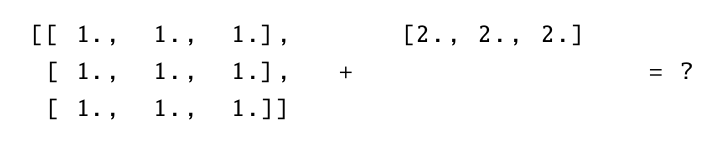

In [ ]:
np.array([2,2,2]).reshape(3,1)

array([[2],
       [2],
       [2]])

In [ ]:
np.hstack((a,np.array([2,2,2]).reshape(3,1)))

array([[1., 1., 1., 2.],
       [1., 1., 1., 2.],
       [1., 1., 1., 2.]])

### Indexando e fatiando arrays

Uma array do numpy pode ser indexada ou fatiada como uma lista nativa do Python. Porém, ao fatiar arrays, o retorno é um view.

Vejamos:

In [ ]:
a = np.linspace(1, 6, 6)
a

array([1., 2., 3., 4., 5., 6.])

In [ ]:
a[1:4:2]# elementos a[1] and a[3] (com stride 2)

array([2., 4.])

In [ ]:
a[3::-2]

array([4., 2.])

No caso de mais de uma dimensão, cada eixo pode ser indexado ou fatiado.

In [ ]:
a = np.linspace(1, 12, 12).reshape(4, 3)
a

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [ ]:
a[3,1] #linha,coluna

11.0

In [ ]:
#usamos : para selecionar todos os índices
a[3,:]

array([10., 11., 12.])

In [ ]:
a[3,1:] #terceira linha, da coluna 1 pra frente

array([11., 12.])

In [ ]:
a[3,:-1] #terceira linha, da coluna 1 pra frente

array([10., 11.])

In [ ]:
a[1:-1,1:]

array([[5., 6.],
       [8., 9.]])

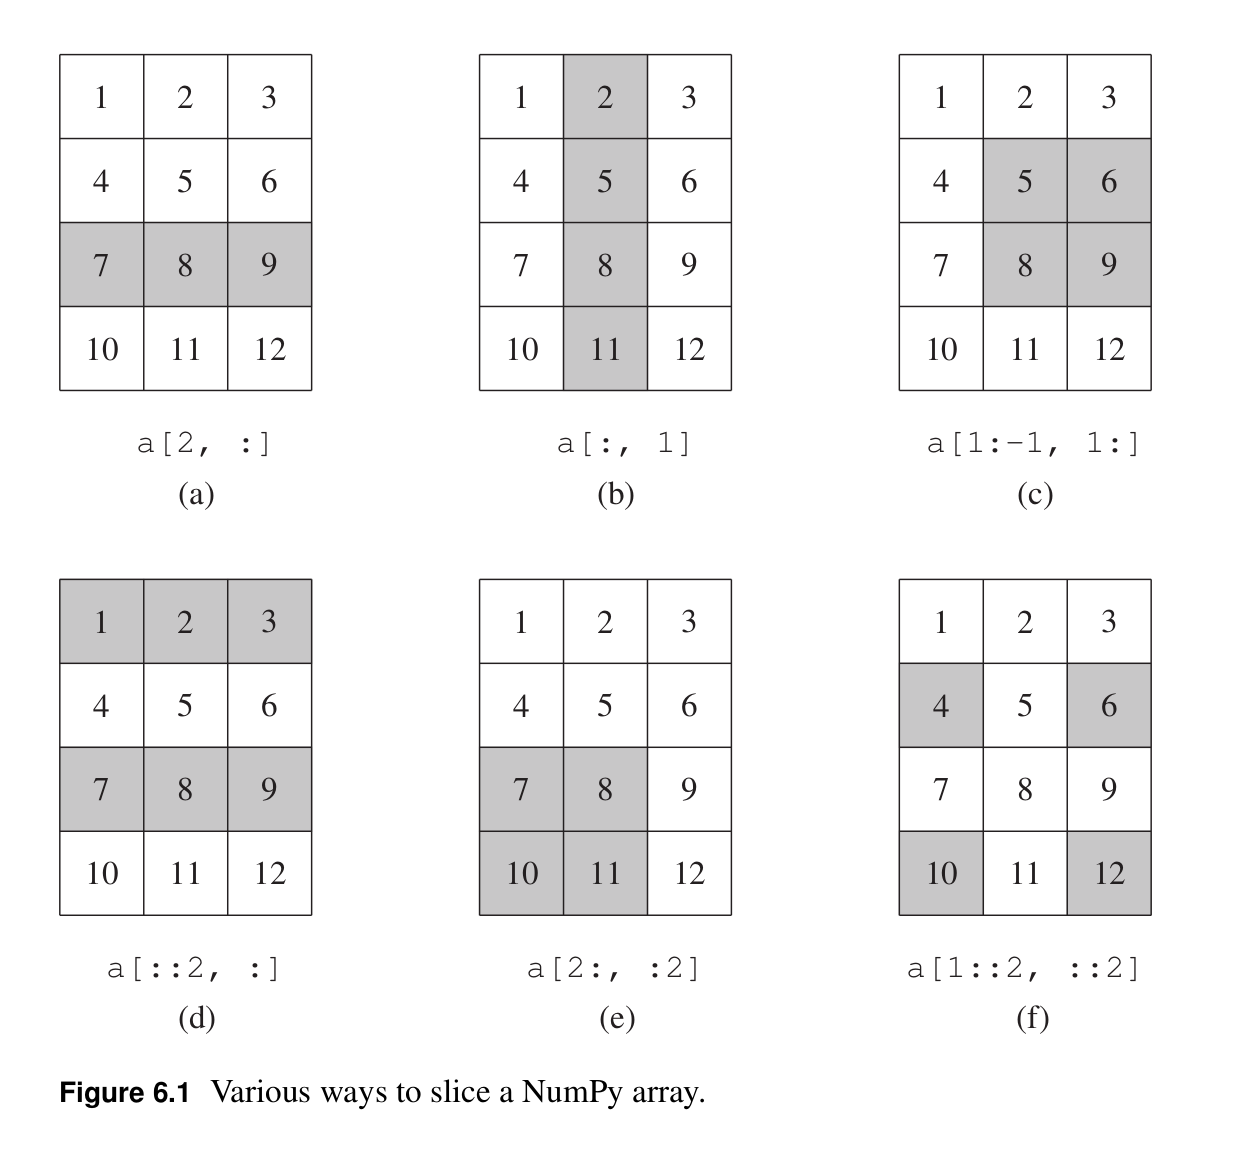

Para arrays de muitas dimensões, podemos usar ... para indicar todos os demais eixos.

In [ ]:
a = np.arange(1,2*2*4*4+1).reshape(2,2,4,4)
a

array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16]],

        [[17, 18, 19, 20],
         [21, 22, 23, 24],
         [25, 26, 27, 28],
         [29, 30, 31, 32]]],


       [[[33, 34, 35, 36],
         [37, 38, 39, 40],
         [41, 42, 43, 44],
         [45, 46, 47, 48]],

        [[49, 50, 51, 52],
         [53, 54, 55, 56],
         [57, 58, 59, 60],
         [61, 62, 63, 64]]]])

In [ ]:
a.shape

(2, 2, 4, 4)

In [ ]:
a[1,1,:,:]

array([[49, 50, 51, 52],
       [53, 54, 55, 56],
       [57, 58, 59, 60],
       [61, 62, 63, 64]])

In [ ]:
#ou podemos usar
a[1,1,...]

array([[49, 50, 51, 52],
       [53, 54, 55, 56],
       [57, 58, 59, 60],
       [61, 62, 63, 64]])

In [ ]:
#podemos usar : ou ... para fazer atribuições
a[1,1,...] = 0
a

array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16]],

        [[17, 18, 19, 20],
         [21, 22, 23, 24],
         [25, 26, 27, 28],
         [29, 30, 31, 32]]],


       [[[33, 34, 35, 36],
         [37, 38, 39, 40],
         [41, 42, 43, 44],
         [45, 46, 47, 48]],

        [[ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0]]]])

In [ ]:
a[:,:,:,2] = -100
a

array([[[[   1,    2, -100,    4],
         [   5,    6, -100,    8],
         [   9,   10, -100,   12],
         [  13,   14, -100,   16]],

        [[  17,   18, -100,   20],
         [  21,   22, -100,   24],
         [  25,   26, -100,   28],
         [  29,   30, -100,   32]]],


       [[[  33,   34, -100,   36],
         [  37,   38, -100,   40],
         [  41,   42, -100,   44],
         [  45,   46, -100,   48]],

        [[   0,    0, -100,    0],
         [   0,    0, -100,    0],
         [   0,    0, -100,    0],
         [   0,    0, -100,    0]]]])

**Indexação avançada**

Arrays do numpy também podem ser indexadas usando outras estruturas de listas (list, tuples, tuples de tuples, etc).

In [ ]:
a = np.linspace(0., 0.5, 6)
a

In [ ]:
ia = [1,4,5]
a[ia]

In [ ]:
ia = np.array(((1 , 2), (3, 4)))
a[ia] #note que forma de ia é passada para a indexação

In [ ]:
a = np. linspace(1, 12, 12).reshape(4, 3)
a

In [ ]:
ia = np.array(((1 , 0), (2, 1)))
ja = np.array(((0 , 1), (1, 2)))

In [ ]:
a[ia,ja] #combina os elementos de ia com ja

Também podemos usar uma lista de bools como índice. Nesse caso, os elementos True são selecionados.

In [ ]:
a = np.array([-2, -1, 0, 1, 2])
ia = np.array([False, True, False, True, True])

In [ ]:
a[ia]

Podemos usar o resultado de expressões lógicas como index:

In [ ]:
a<0

In [ ]:
a[a<0] #seleciona os número negativos

In [ ]:
anos = np.array([1900, 1904, 1990, 1993, 2000, 2014, 2016, 2024, 2100])

In [ ]:
bissexto = (anos % 400 == 0) | (anos % 4 == 0) & ~(anos % 100 == 0)

In [ ]:
anos[bissexto]

**Adicionando uma nova dimensão**

In [ ]:
a = np.linspace(1, 4, 4).reshape(2, 2)
a

In [ ]:
a.shape

In [ ]:
b = a[:,:,np.newaxis]
b

In [ ]:
b.shape

In [ ]:
#podemos usar também None
a[:,:,None]

*Exemplo E6.4* Validando um tabuleiro de Sudoku.

Para ser válido, devemos ter uma matriz 9x9 na qual todas as linhas e colunas contenham os números de 1 a 9; e que bloco 3x3 não superpostas também contenham esses números.

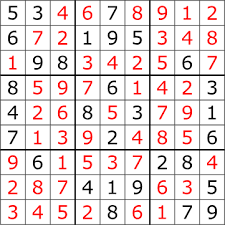

In [ ]:
sudoku = """145327698
            839654127
            672918543
            496185372
            218473956
            753296481
            367542819
            984761235
            521839764"""

grid = np.array([[int(i) for i in line] for line in sudoku.split()])

grid

In [ ]:
sns.heatmap(grid,annot=True)

In [ ]:
grid[1,:]

In [ ]:
def valida_sudoku(grid):
    """Retorna True se for válido ou False caso contrário. """
    for i in range(9):

        # j, k calcula os índices dos cantos 3x3
        # veja abaixo
        j, k = (i // 3)* 3, (i % 3)*3

        linha_9  = len(set(grid[i,:])) != 9 #verifica se a linha tem 1...9
        coluna_9 = len(set(grid[:,i])) != 9 #verifica se a coluna tem 1...9
        #verifica se o bloco 3x4 tem 1...9
        bloco3x3_9 = len(set(grid[j:j+3, k:k+3].ravel())) != 9
        # print(linha_9,coluna_9,bloco3x3_9)
        if (linha_9) or (coluna_9) or (bloco3x3_9):
            return False

    return True

In [ ]:
for i in range(9):
 print((i//3)*3, (i%3)*3)

In [ ]:
valida_sudoku(grid)

In [ ]:
grid[0,0]=5

In [ ]:
valida_sudoku(grid)

**Criando malhas com o np.meshgrid**

Esse tipo de estrutura é muito útil para avaliar funções 3d num grid xy.

Vejamos:

In [ ]:
x = np.linspace(0, 5, 6)
y = np.linspace(0, 5, 6)

X, Y = np.meshgrid(x,y)

In [ ]:
X

In [ ]:
Y

Combinado X e Y, temos todos os pares i,j com i,j=0,...5

In [ ]:
np.stack((X,Y)).T

In [ ]:
np.vstack(np.stack((X,Y)).T)

In [ ]:
plt.scatter(*np.vstack(np.stack((X,Y)).T).T)

In [ ]:
def gauss3d(x,y):
    return np.exp(-(x**2+y**2)/2)

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x,y)
Z = gauss3d(X,Y)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Surface(x=X,y=Y,z=Z))
fig.show()

In [ ]:
def pacotegauss3d(x,y,omega=4):
    return np.sin((x+y)*omega)*np.exp(-(x**2+y**2)/(2*1.))
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x,y)
Z = pacotegauss3d(X,Y)

In [ ]:
fig = go.Figure(go.Surface(x=X,y=Y,z=Z))
fig.show()